In [1]:
import numpy as np
import pandas as pd

import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [2]:
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 7.69 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37947,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 7.69 GiB
Comm: tcp://127.0.0.1:40667,Total threads: 1
Dashboard: http://127.0.0.1:39407/status,Memory: 1.92 GiB
Nanny: tcp://127.0.0.1:41597,


In [3]:
client.dashboard_link

'http://127.0.0.1:8787/status'

In [5]:
@dask.delayed
def inc(x):
   return x + 1

@dask.delayed
def add(x, y):
   return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

c = c.compute()  # This triggers all of the above computations

In [7]:
from dask.distributed import Client

client = Client()

def inc(x):
   return x + 1

def add(x, y):
   return x + y

a = client.submit(inc, 1)     # work starts immediately
b = client.submit(inc, 2)     # work starts immediately
c = client.submit(add, a, b)  # work starts immediately

c = c.result()                # block until work finishes, then gather result
c

/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33389 instead
  warnings.warn(


5

In [8]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client.dashboard_link

/home/carlos/PycharmProjects/cbnetwork/.venv/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46185 instead
  warnings.warn(


'http://127.0.0.1:46185/status'

In [12]:
cluster.scale(4)

In [15]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

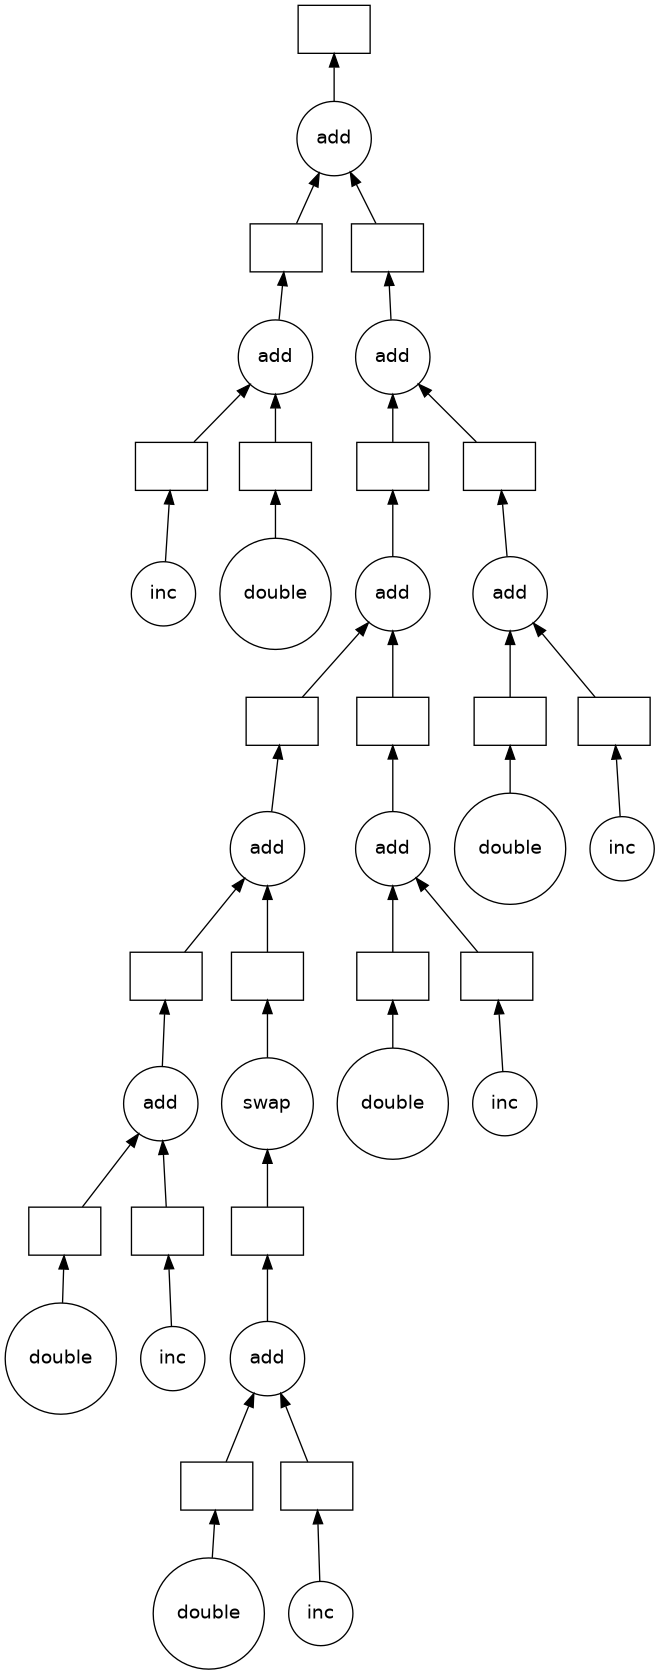

In [16]:
total.visualize()

In [17]:
total.compute()

50